# import lib

In [1]:
from IPython.display import Image, display
# preprocessing and processing
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
# ploting
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from tensorflow.keras.utils import plot_model
# split data
from sklearn.model_selection import train_test_split
# CNN
from keras import models, layers
# val
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
# plot all images
from pathlib import Path
import random
from PIL import Image

In [2]:
import os


labels = os.listdir('/kaggle/input/finger-prints-1-10/Finger print Dataset (1-10)/')
print(labels)

['007', '009', '001', '006', '008', '002', '004', '003', '005', '010']


# show some images

# vis count image for all classes

In [3]:
num = []
for label in labels:
    path = '/kaggle/input/finger-prints-1-10/Finger print Dataset (1-10)/{0}/'.format(label)
    folder_data = os.listdir(path)
    k = 0
    for image_path in folder_data:
        k = k+1
        
    num.append(k)
    print(f'count : {k} images , label : {label} class')

count : 6 images , label : 007 class
count : 6 images , label : 009 class
count : 6 images , label : 001 class
count : 6 images , label : 006 class
count : 6 images , label : 008 class
count : 6 images , label : 002 class
count : 6 images , label : 004 class
count : 6 images , label : 003 class
count : 6 images , label : 005 class
count : 6 images , label : 010 class


In [4]:
fig = go.Figure(data=[go.Bar(
            x=labels, y=num,
            text=num,
            textposition='auto',
        )])
fig.update_layout(title_text='NUMBER OF IMAGES CONTAINED IN EACH CLASS')
fig.show()

# show shaps and stadardizing input data

In [5]:
import cv2
xp=[]
yp=[]

for label in labels:
    path = '/kaggle/input/finger-prints-1-10/Finger print Dataset (1-10)/{0}/'.format(label)
    folder_data = os.listdir(path)
    for image_path in folder_data:
        image = cv2.imread(path+image_path)
        height, width, channels = image.shape
        xp.append(width)
        yp.append(height)
        pass
    pass




In [6]:
print('average Width: ', np.array(xp).mean())
print('average Height: ', np.array(yp).mean())

average Width:  1287.1333333333334
average Height:  1287.4666666666667


In [7]:
x_data =[]
y_data = []
import cv2
for label in labels:
    path = '/kaggle/input/finger-prints-1-10/Finger print Dataset (1-10)/{0}/'.format(label)
    folder_data = os.listdir(path)
    for image_path in folder_data:
        image = cv2.imread(path+image_path)
        image_resized = cv2.resize(image, (512,512))
        x_data.append(np.array(image_resized))
        y_data.append(label)
        pass
    pass

x_data = np.array(x_data)
y_data = np.array(y_data)
print('the shape of X is: ', x_data.shape, 'and that of Y is: ', y_data.shape)
x_data = x_data.astype('float32')/255

the shape of X is:  (60, 512, 512, 3) and that of Y is:  (60,)


In [8]:

x_data_gray = [cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) for img in x_data]
x_data_gray = np.array(x_data_gray)

x_data_gray = x_data_gray.reshape(x_data_gray.shape[0], x_data_gray.shape[1], x_data_gray.shape[2], 1)


# converting y data into categorical data

In [9]:
y_encoded = LabelEncoder().fit_transform(y_data)
y_categorical = to_categorical(y_encoded)

# shuffle data

In [10]:
r = np.arange(x_data.shape[0])
np.random.seed(42)
np.random.shuffle(r)
X = x_data_gray[r]
Y = y_categorical[r]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33)

# create a CNN model

In [11]:
import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)


In [12]:
print(x_data_gray.shape[0], x_data_gray.shape[1], x_data_gray.shape[2], 1)
print(x_data_gray.shape[1], x_data_gray.shape[2], 1)

60 512 512 1
512 512 1


In [13]:
model = models.Sequential()
model.add(layers.Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=(x_data_gray.shape[1], x_data_gray.shape[2], 1)))
model.add(layers.MaxPool2D(pool_size=(2, 2)))
model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2, 2)))
model.add(layers.Dropout(rate=0.25))
model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2, 2)))
model.add(layers.Dropout(rate=0.25))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(rate=0.5))
model.add(layers.Dense(10, activation='softmax'))

# compile the CNN model

In [14]:
model.compile(
    loss='categorical_crossentropy', 
    optimizer='adam', 
    metrics=['accuracy'])

# training model

In [15]:
history = model.fit(X_train, Y_train, epochs=150, validation_split=0.2,batch_size=64)

Epoch 1/150
1/1 [==============================] - 13s 13s/step - loss: 2.3313 - accuracy: 0.0312 - val_loss: 8.3795 - val_accuracy: 0.0000e+00
Epoch 2/150
1/1 [==============================] - 0s 256ms/step - loss: 13.5993 - accuracy: 0.0625 - val_loss: 4.3833 - val_accuracy: 0.0000e+00
Epoch 3/150
1/1 [==============================] - 0s 256ms/step - loss: 11.0947 - accuracy: 0.0938 - val_loss: 2.2118 - val_accuracy: 0.2500
Epoch 4/150
1/1 [==============================] - 0s 255ms/step - loss: 4.8921 - accuracy: 0.1875 - val_loss: 2.2536 - val_accuracy: 0.0000e+00
Epoch 5/150
1/1 [==============================] - 0s 253ms/step - loss: 2.6615 - accuracy: 0.1875 - val_loss: 2.2911 - val_accuracy: 0.0000e+00
Epoch 6/150
1/1 [==============================] - 0s 257ms/step - loss: 2.3455 - accuracy: 0.1250 - val_loss: 2.3025 - val_accuracy: 0.1250
Epoch 7/150
1/1 [==============================] - 0s 254ms/step - loss: 2.3158 - accuracy: 0.1562 - val_loss: 2.3031 - val_accuracy: 0.1

# Plot CNN model

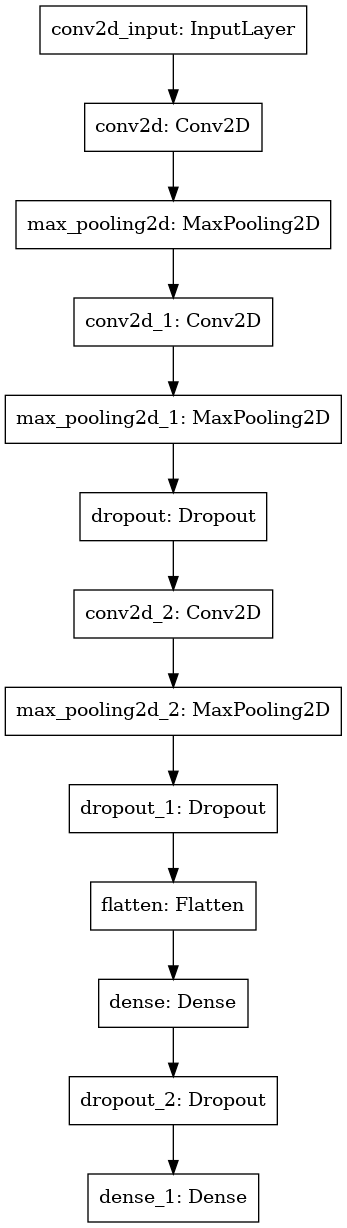

In [16]:
plot_model(model)

# Accuracy Score

In [17]:
Y_pred = np.argmax(model.predict(X_test), axis=1)
Y_test = np.argmax(Y_test, axis = 1)
print(Y_pred,'\n',Y_test)
accuracy_score(Y_pred,Y_test)

[4 3 5 4 0 2 7 1 6 0 5 7 2 5 5 1 1 9 4 6] 
 [3 3 5 4 0 2 7 1 0 2 5 3 2 5 5 4 6 0 3 6]


0.6

In [18]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.50      0.33      0.40         3
           1       0.33      1.00      0.50         1
           2       1.00      0.67      0.80         3
           3       1.00      0.25      0.40         4
           4       0.33      0.50      0.40         2
           5       1.00      1.00      1.00         4
           6       0.50      0.50      0.50         2
           7       0.50      1.00      0.67         1
           9       0.00      0.00      0.00         0

    accuracy                           0.60        20
   macro avg       0.57      0.58      0.52        20
weighted avg       0.75      0.60      0.61        20



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.



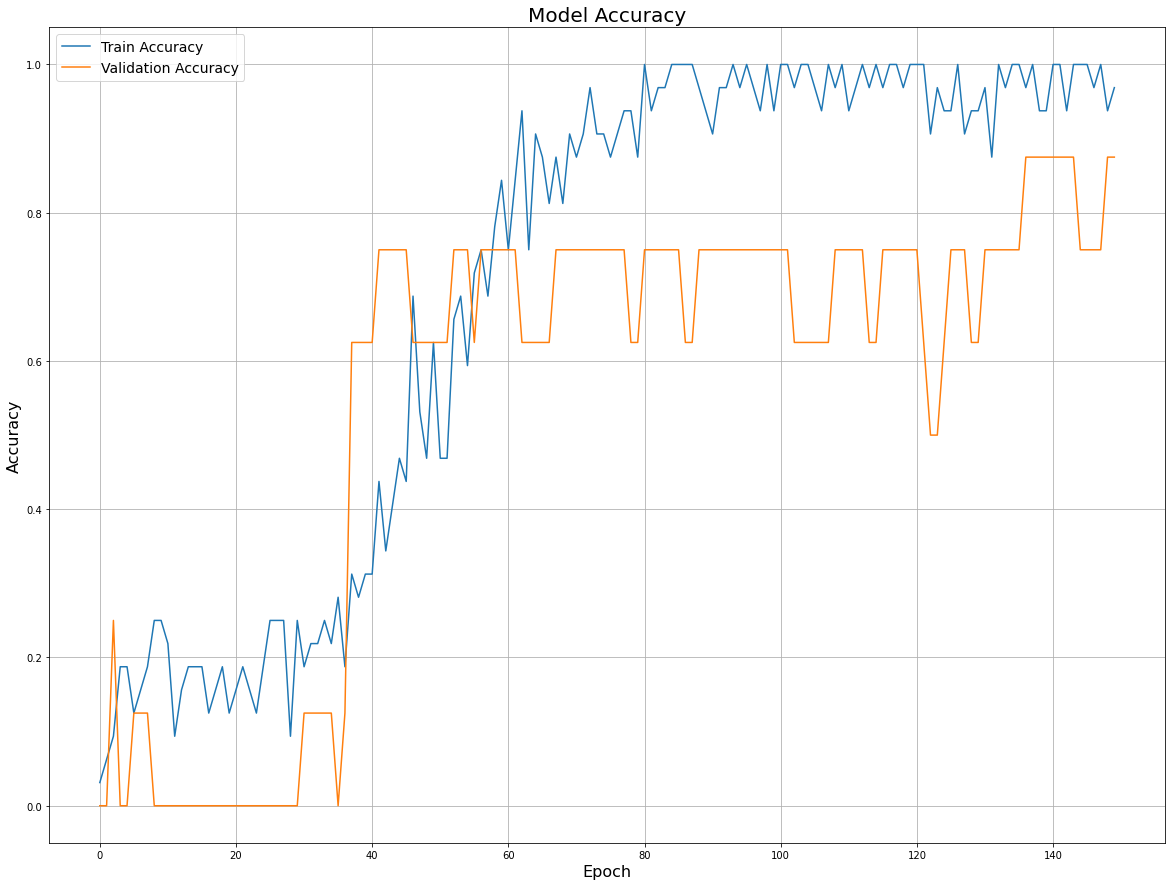

In [19]:
plt.figure(figsize=(20, 15))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy', fontsize=20)
plt.ylabel('Accuracy', fontsize=16)
plt.xlabel('Epoch', fontsize=16)
plt.legend(loc='upper left', fontsize=14)
plt.grid(True)
plt.show()

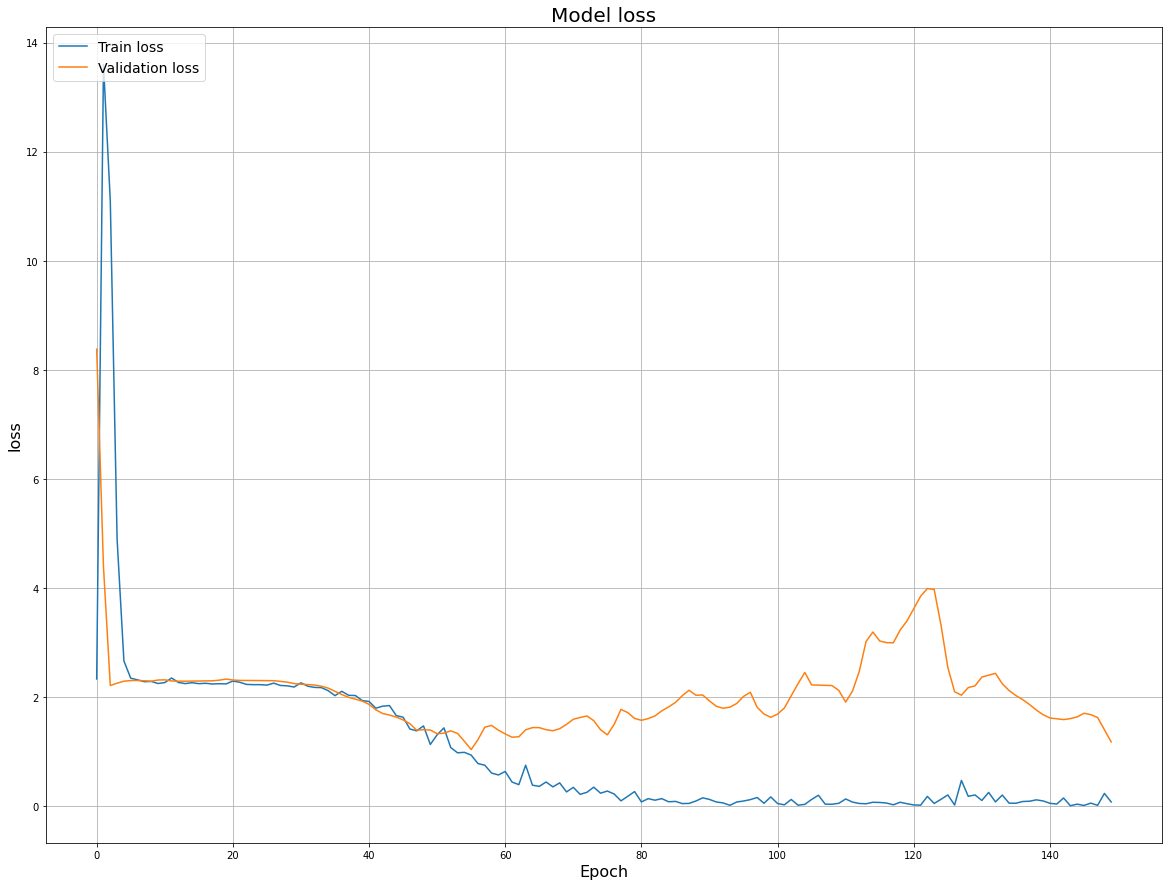

In [20]:
plt.figure(figsize=(20, 15))
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Model loss', fontsize=20)
plt.ylabel('loss', fontsize=16)
plt.xlabel('Epoch', fontsize=16)
plt.legend(loc='upper left', fontsize=14)
plt.grid(True)
plt.show()

In [21]:
Y_pred[:20]

array([4, 3, 5, 4, 0, 2, 7, 1, 6, 0, 5, 7, 2, 5, 5, 1, 1, 9, 4, 6])

In [22]:
Y_test[:20]

array([3, 3, 5, 4, 0, 2, 7, 1, 0, 2, 5, 3, 2, 5, 5, 4, 6, 0, 3, 6])

In [23]:
# image = cv2.imread('/kaggle/input/finger-prints-1-10/Finger print Dataset (1-10)/005/005_6.jpg')
# image_resized = cv2.resize(image, (512,512))
# x_data_gray = cv2.cvtColor(image_resized, cv2.COLOR_BGR2GRAY) 
# x_data_gray = np.array(x_data_gray)
# # print(x_data_gray.shape)

# x_data_gray = x_data_gray.reshape(1,x_data_gray.shape[0], x_data_gray.shape[1], 1)
# # print(x_data_gray.shape)

# pr = np.argmax(model.predict(x_data_gray))
# print(pr)

In [24]:
history_dict = history.history
history_df = pd.DataFrame(history_dict)
history_df.head()

,loss,accuracy,val_loss,val_accuracy
0,2.331304,0.03125,8.379457,0.00
1,13.599279,0.06250,4.383267,0.00
2,11.094659,0.09375,2.211821,0.25
3,4.892143,0.18750,2.253613,0.00
4,2.661542,0.18750,2.291053,0.00


In [25]:
history_df.loc[history_df['val_accuracy']== history_df.val_accuracy.max()]

,loss,accuracy,val_loss,val_accuracy
136,0.084750,0.96875,1.952937,0.875
137,0.089495,1.00000,1.863059,0.875
138,0.115121,0.93750,1.761913,0.875
139,0.094596,0.93750,1.675382,0.875
140,0.051716,1.00000,1.616489,0.875
141,0.038009,1.00000,1.600737,0.875
142,0.149056,0.93750,1.586750,0.875
143,0.006978,1.00000,1.604234,0.875
148,0.232665,0.93750,1.402760,0.875
149,0.076120,0.96875,1.176495,0.875
